In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("CIFAR-10 dataset loaded and preprocessed.")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


CIFAR-10 dataset loaded and preprocessed.
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [10]:
from sklearn.model_selection import train_test_split
# Split train set into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [49]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
import time
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Define MLP architecture without L2 norm regularization
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))  # Input layer
model.add(Dense(128, activation='relu'))      # First hidden layer
model.add(Dense(64, activation='relu'))       # Second hidden layer
model.add(Dense(10, activation='softmax'))    # Fully connected layer

# Compile the model with SGD optimizer and categorical cross-entropy loss
model.compile(optimizer=SGD(learning_rate=0.01),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

# Mesurer le temps de début de l'entraînement
start_time = time.time()

# Entraîner le modèle avec Mini-batch SGD
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val))

# Mesurer le temps de fin de l'entraînement
end_time = time.time()

# Calculer le temps total d'entraînement
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

# Obtenir les prédictions du modèle sur les données de validation
y_val_pred = model.predict(x_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val, axis=1)

# Calculer les métriques F1-score, recall et precision
f1 = f1_score(y_val_true, y_val_pred_classes, average='weighted')
recall = recall_score(y_val_true, y_val_pred_classes, average='weighted')
precision = precision_score(y_val_true, y_val_pred_classes, average='weighted')

print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Epoch 1/50
313/313 [==============================] - 3s 8ms/step - loss: 2.0687 - accuracy: 0.2625 - val_loss: 1.9413 - val_accuracy: 0.3054
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8854 - accuracy: 0.3342 - val_loss: 1.8664 - val_accuracy: 0.3355
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8208 - accuracy: 0.3582 - val_loss: 1.7932 - val_accuracy: 0.3600
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7764 - accuracy: 0.3735 - val_loss: 1.7532 - val_accuracy: 0.3766
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7418 - accuracy: 0.3864 - val_loss: 1.7402 - val_accuracy: 0.3781
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7098 - accuracy: 0.3964 - val_loss: 1.7069 - val_accuracy: 0.3972
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.6838 - accuracy: 0.4071 - val_loss: 1.7038 - val_accuracy: 0.3940
Epoch 

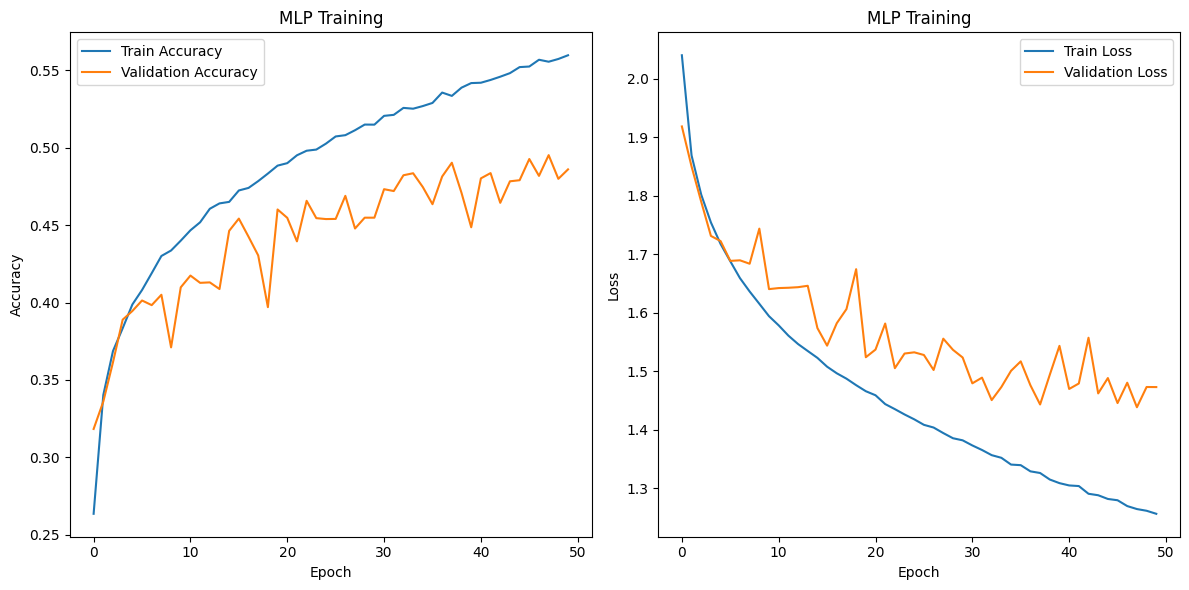

In [44]:
# Plot learning curves for training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MLP Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [45]:
# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Afficher les valeurs numériques
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
# Évaluer le modèle sur les données de validation
val_loss, val_accuracy = model.evaluate(x_val, y_val)

# Afficher les valeurs numériques
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 1.4677 - accuracy: 0.4826
Test Loss: 1.4676523208618164
Test Accuracy: 0.48260000348091125
313/313 [==============================] - 1s 3ms/step - loss: 1.4728 - accuracy: 0.4860
Validation Loss: 1.4728093147277832
Validation Accuracy: 0.4860000014305115


In [21]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.activations import relu, softmax
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.regularizers import l2

# Define MLP architecture without L2 norm regularization
model_without_l2 = Sequential()
model_without_l2.add(Flatten(input_shape=(32, 32, 3)))  # Input layer
model_without_l2.add(Dense(128, activation=relu))      # First hidden layer
model_without_l2.add(Dense(64, activation=relu))       # Second hidden layer
model_without_l2.add(Dense(10, activation=softmax))    # Fully connected layer

# Compile the model without L2 norm regularization
model_without_l2.compile(optimizer=SGD(learning_rate=0.01),
                         loss=categorical_crossentropy,
                         metrics=['accuracy'])

# Train the model without L2 norm regularization
history_without_l2 = model_without_l2.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val))

# Define MLP architecture with L2 norm regularization
model_with_l2 = Sequential()
model_with_l2.add(Flatten(input_shape=(32, 32, 3)))              # Input layer
model_with_l2.add(Dense(128, activation=relu))                  # First hidden layer
model_with_l2.add(Dense(64, activation=relu, kernel_regularizer=l2(0.01)))  # Second hidden layer with L2 regularization
model_with_l2.add(Dense(10, activation=softmax))                # Fully connected layer

# Compile the model with L2 norm regularization
model_with_l2.compile(optimizer=SGD(learning_rate=0.01),
                       loss=categorical_crossentropy,
                       metrics=['accuracy'])

# Train the model with L2 norm regularization
history_with_l2 = model_with_l2.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val))


Epoch 1/50
313/313 [==============================] - 3s 8ms/step - loss: 2.0316 - accuracy: 0.2675 - val_loss: 1.9074 - val_accuracy: 0.3120
Epoch 2/50
313/313 [==============================] - 2s 6ms/step - loss: 1.8652 - accuracy: 0.3394 - val_loss: 1.8232 - val_accuracy: 0.3502
Epoch 3/50
313/313 [==============================] - 2s 6ms/step - loss: 1.8022 - accuracy: 0.3633 - val_loss: 1.8150 - val_accuracy: 0.3449
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7572 - accuracy: 0.3788 - val_loss: 1.7409 - val_accuracy: 0.3835
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7219 - accuracy: 0.3950 - val_loss: 1.7312 - val_accuracy: 0.3864
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.6897 - accuracy: 0.4031 - val_loss: 1.7100 - val_accuracy: 0.3850
Epoch 7/50
313/313 [==============================] - 2s 6ms/step - loss: 1.6667 - accuracy: 0.4148 - val_loss: 1.6990 - val_accuracy: 0.3884
Epoch 

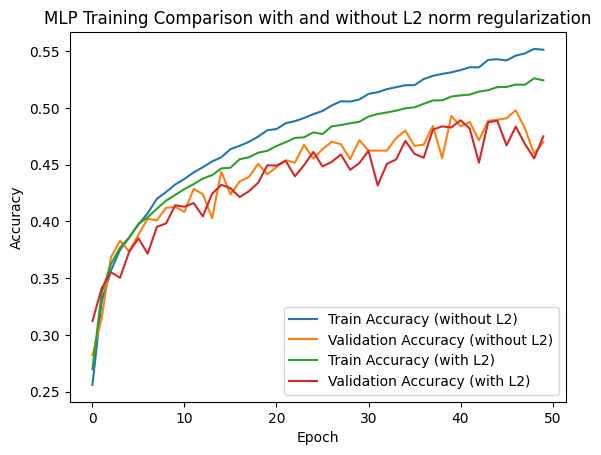

In [20]:

# Plot learning curves for both models
plt.plot(history_without_l2.history['accuracy'], label='Train Accuracy (without L2)')
plt.plot(history_without_l2.history['val_accuracy'], label='Validation Accuracy (without L2)')
plt.plot(history_with_l2.history['accuracy'], label='Train Accuracy (with L2)')
plt.plot(history_with_l2.history['val_accuracy'], label='Validation Accuracy (with L2)')
plt.title('MLP Training Comparison with and without L2 norm regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


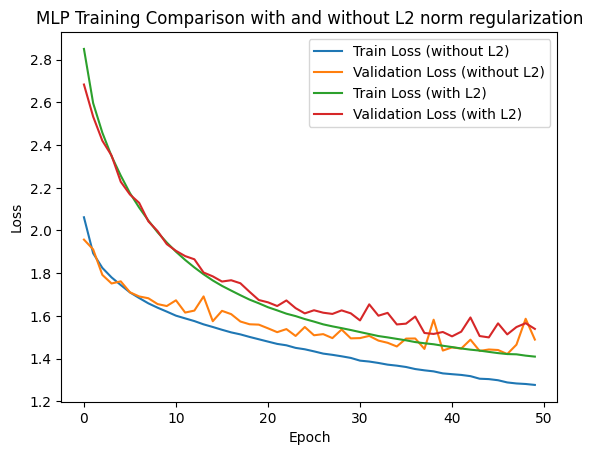

In [19]:
# Plot learning curves for both models (loss)
plt.plot(history_without_l2.history['loss'], label='Train Loss (without L2)')
plt.plot(history_without_l2.history['val_loss'], label='Validation Loss (without L2)')
plt.plot(history_with_l2.history['loss'], label='Train Loss (with L2)')
plt.plot(history_with_l2.history['val_loss'], label='Validation Loss (with L2)')
plt.title('MLP Training Comparison with and without L2 norm regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
# Afficher les dernières valeurs numériques de loss et d'accuracy pour le modèle sans L2
loss_without_l2, accuracy_without_l2 = model_without_l2.evaluate(x_test, y_test)
print("Model without L2 regularization:")
print("Test Loss:", loss_without_l2)
print("Test Accuracy:", accuracy_without_l2)

# Afficher les dernières valeurs numériques de loss et d'accuracy pour le modèle avec L2
loss_with_l2, accuracy_with_l2 = model_with_l2.evaluate(x_test, y_test)
print("\nModel with L2 regularization:")
print("Test Loss:", loss_with_l2)
print("Test Accuracy:", accuracy_with_l2)

# Afficher les dernières valeurs numériques de loss et d'accuracy pour le modèle sans L2 sur les données de validation
val_loss_without_l2, val_accuracy_without_l2 = model_without_l2.evaluate(x_val, y_val)
print("Model without L2 regularization (Validation):")
print("Validation Loss:", val_loss_without_l2)
print("Validation Accuracy:", val_accuracy_without_l2)

# Afficher les dernières valeurs numériques de loss et d'accuracy pour le modèle avec L2 sur les données de validation
val_loss_with_l2, val_accuracy_with_l2 = model_with_l2.evaluate(x_val, y_val)
print("\nModel with L2 regularization (Validation):")
print("Validation Loss:", val_loss_with_l2)
print("Validation Accuracy:", val_accuracy_with_l2)


313/313 [==============================] - 1s 3ms/step - loss: 1.4746 - accuracy: 0.4729
Model without L2 regularization:
Test Loss: 1.4746242761611938
Test Accuracy: 0.47290000319480896
313/313 [==============================] - 1s 3ms/step - loss: 1.5247 - accuracy: 0.4829

Model with L2 regularization:
Test Loss: 1.5247308015823364
Test Accuracy: 0.4828999936580658
313/313 [==============================] - 1s 3ms/step - loss: 1.4847 - accuracy: 0.4672
Model without L2 regularization (Validation):
Validation Loss: 1.484710454940796
Validation Accuracy: 0.46720001101493835
313/313 [==============================] - 1s 2ms/step - loss: 1.5450 - accuracy: 0.4743

Model with L2 regularization (Validation):
Validation Loss: 1.5449604988098145
Validation Accuracy: 0.47429999709129333


In [26]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.activations import relu, softmax
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.regularizers import l2

# Define MLP architecture with dropout for different rates
dropout_rates = [0.2, 0.3, 0.5]
histories_dropout = []

for dropout_rate in dropout_rates:
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))              # Input layer
    model.add(Dense(128, activation=relu))                  # First hidden layer
    model.add(Dense(64, activation=relu))                   # Second hidden layer
    model.add(Dropout(dropout_rate))                        # Dropout layer with the specified rate
    model.add(Dense(10, activation=softmax))                # Fully connected layer

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=0.01),
                  loss=categorical_crossentropy,
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val))
    histories_dropout.append(history)

Epoch 1/50
313/313 [==============================] - 4s 9ms/step - loss: 2.1085 - accuracy: 0.2192 - val_loss: 1.9810 - val_accuracy: 0.2847
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.9609 - accuracy: 0.2946 - val_loss: 1.8836 - val_accuracy: 0.3424
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8921 - accuracy: 0.3222 - val_loss: 1.8618 - val_accuracy: 0.3276
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8433 - accuracy: 0.3390 - val_loss: 1.8044 - val_accuracy: 0.3592
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8077 - accuracy: 0.3564 - val_loss: 1.7518 - val_accuracy: 0.3775
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7743 - accuracy: 0.3686 - val_loss: 1.7365 - val_accuracy: 0.3788
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7476 - accuracy: 0.3811 - val_loss: 1.7035 - val_accuracy: 0.3930
Epoch 

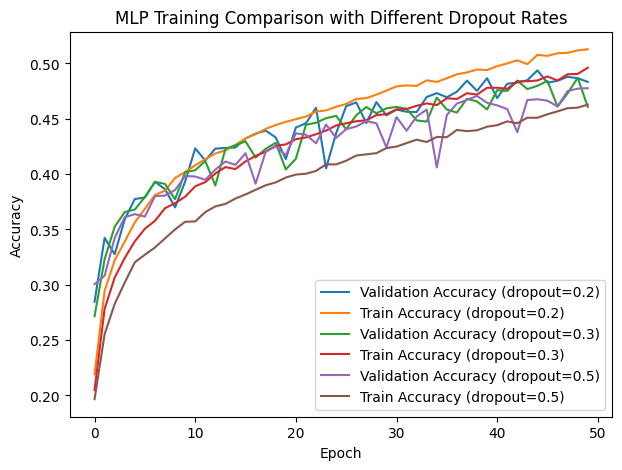

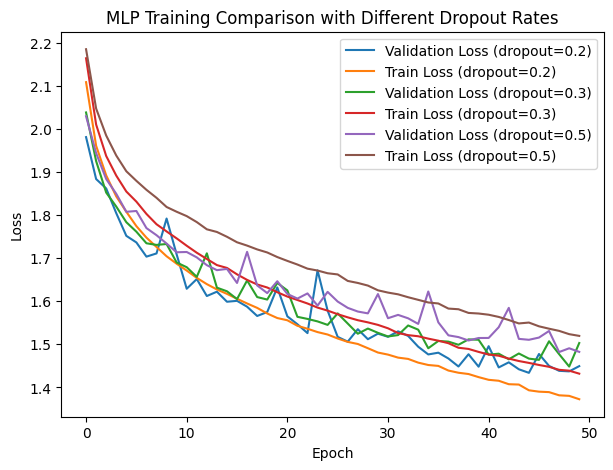

In [30]:
# Plot learning curves for models with different dropout rates (accuracy)
plt.figure(figsize=(7, 5))  # Réduire la taille de la figure
for i, dropout_rate in enumerate(dropout_rates):
    plt.plot(histories_dropout[i].history['val_accuracy'], label=f'Validation Accuracy (dropout={dropout_rate})')
    plt.plot(histories_dropout[i].history['accuracy'], label=f'Train Accuracy (dropout={dropout_rate})')

plt.title('MLP Training Comparison with Different Dropout Rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot learning curves for models with different dropout rates (loss)
plt.figure(figsize=(7, 5))  # Réduire la taille de la figure
for i, dropout_rate in enumerate(dropout_rates):
    plt.plot(histories_dropout[i].history['val_loss'], label=f'Validation Loss (dropout={dropout_rate})')
    plt.plot(histories_dropout[i].history['loss'], label=f'Train Loss (dropout={dropout_rate})')

plt.title('MLP Training Comparison with Different Dropout Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [52]:
import numpy as np
from sklearn.metrics import f1_score, recall_score, precision_score

# Listes pour stocker les métriques
val_losses = []
val_accuracies = []
f1_scores = []
recalls = []
precisions = []

for history in histories_dropout:
    # Obtenir la perte et l'exactitude (accuracy) sur les données de validation
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

    # Évaluer le modèle sur les données de validation
    val_loss, val_accuracy = model.evaluate(x_val, y_val)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Obtenir les prédictions du modèle sur les données de validation
    y_val_pred = model.predict(x_val)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true = np.argmax(y_val, axis=1)

    # Calculer les métriques F1-score, recall et precision
    f1 = f1_score(y_val_true, y_val_pred_classes, average='weighted')
    recall = recall_score(y_val_true, y_val_pred_classes, average='weighted')
    precision = precision_score(y_val_true, y_val_pred_classes, average='weighted')

    f1_scores.append(f1)
    recalls.append(recall)
    precisions.append(precision)

# Afficher les valeurs numériques
for i, dropout_rate in enumerate(dropout_rates):
    print(f"Dropout Rate: {dropout_rate}")
    print("Validation Loss:", val_losses[i])
    print("Validation Accuracy:", val_accuracies[i])
    print("F1 Score:", f1_scores[i])
    print("Recall:", recalls[i])
    print("Precision:", precisions[i])
    print("\n")


313/313 [==============================] - 1s 3ms/step
Dropout Rate: 0.2
Validation Loss: 1.5004463195800781
Validation Accuracy: 0.4745999872684479
F1 Score: 0.4641256622898617
Recall: 0.4746
Precision: 0.49125908337465346


Dropout Rate: 0.3
Validation Loss: 1.5004463195800781
Validation Accuracy: 0.4745999872684479
F1 Score: 0.4641256622898617
Recall: 0.4746
Precision: 0.49125908337465346


Dropout Rate: 0.5
Validation Loss: 1.5004463195800781
Validation Accuracy: 0.4745999872684479
F1 Score: 0.4641256622898617
Recall: 0.4746
Precision: 0.49125908337465346




In [32]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.activations import relu, softmax
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.callbacks import EarlyStopping

# Define MLP architecture with dropout for different rates
dropout_rates = [0.2, 0.3, 0.5]
histories_dropout = []

for dropout_rate in dropout_rates:
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))              # Input layer
    model.add(Dense(128, activation=relu))                  # First hidden layer
    model.add(Dense(64, activation=relu))                   # Second hidden layer
    model.add(Dropout(dropout_rate))                        # Dropout layer with the specified rate
    model.add(Dense(10, activation=softmax))                # Fully connected layer

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=0.01),
                  loss=categorical_crossentropy,
                  metrics=['accuracy'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

    # Train the model with early stopping
    history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val), callbacks=[early_stopping])
    histories_dropout.append(history)

    # Print the epoch at which the training stopped
    print(f"Model with dropout rate {dropout_rate}: Training stopped at epoch {early_stopping.stopped_epoch + 1}")

Epoch 1/50
313/313 [==============================] - 3s 8ms/step - loss: 2.1037 - accuracy: 0.2314 - val_loss: 1.9627 - val_accuracy: 0.3079
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.9448 - accuracy: 0.2998 - val_loss: 1.8779 - val_accuracy: 0.3403
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8755 - accuracy: 0.3297 - val_loss: 1.8208 - val_accuracy: 0.3550
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8309 - accuracy: 0.3488 - val_loss: 1.7779 - val_accuracy: 0.3703
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8002 - accuracy: 0.3586 - val_loss: 1.7539 - val_accuracy: 0.3801
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7709 - accuracy: 0.3707 - val_loss: 1.7425 - val_accuracy: 0.3791
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7448 - accuracy: 0.3795 - val_loss: 1.7122 - val_accuracy: 0.3929
Epoch 

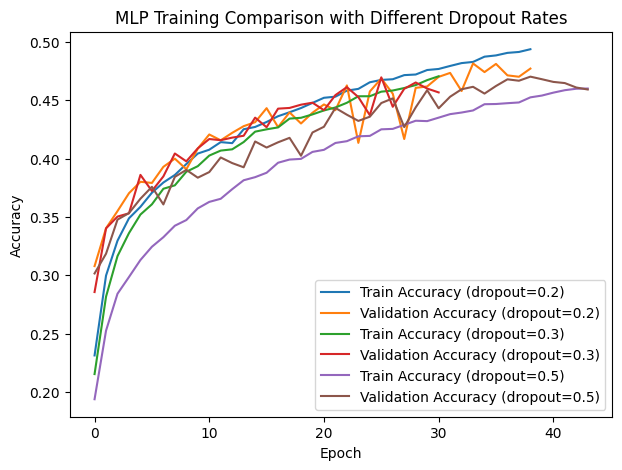

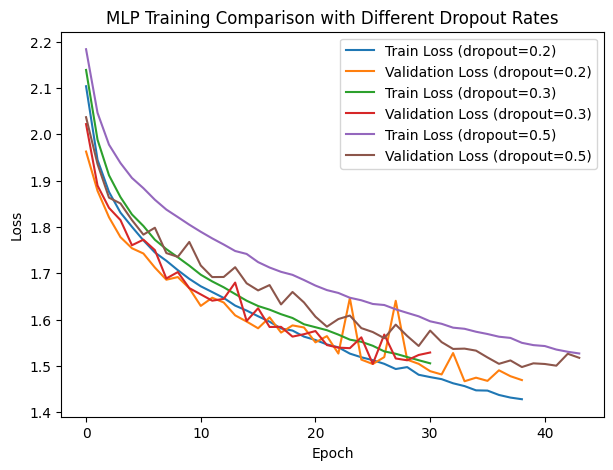

In [33]:
# Plot learning curves for models with different dropout rates (training and validation)
plt.figure(figsize=(7, 5))
for i, dropout_rate in enumerate(dropout_rates):
    plt.plot(histories_dropout[i].history['accuracy'], label=f'Train Accuracy (dropout={dropout_rate})')
    plt.plot(histories_dropout[i].history['val_accuracy'], label=f'Validation Accuracy (dropout={dropout_rate})')

plt.title('MLP Training Comparison with Different Dropout Rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
for i, dropout_rate in enumerate(dropout_rates):
    plt.plot(histories_dropout[i].history['loss'], label=f'Train Loss (dropout={dropout_rate})')
    plt.plot(histories_dropout[i].history['val_loss'], label=f'Validation Loss (dropout={dropout_rate})')

plt.title('MLP Training Comparison with Different Dropout Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [53]:
import numpy as np

# Listes pour stocker les métriques
val_losses = []
val_accuracies = []

for history in histories_dropout:
    # Obtenir la perte et l'exactitude (accuracy) sur les données de validation
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

    # Évaluer le modèle sur les données de validation
    val_loss, val_accuracy = model.evaluate(x_val, y_val)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

# Afficher les valeurs numériques
for i, dropout_rate in enumerate(dropout_rates):
    print(f"Dropout Rate: {dropout_rate}")
    print("Validation Loss:", val_losses[i])
    print("Validation Accuracy:", val_accuracies[i])
    print("\n")


313/313 [==============================] - 1s 3ms/step - loss: 1.5004 - accuracy: 0.4746
Dropout Rate: 0.2
Validation Loss: 1.5004463195800781
Validation Accuracy: 0.4745999872684479


Dropout Rate: 0.3
Validation Loss: 1.5004463195800781
Validation Accuracy: 0.4745999872684479


Dropout Rate: 0.5
Validation Loss: 1.5004463195800781
Validation Accuracy: 0.4745999872684479




Epoch 1/50
313/313 [==============================] - 4s 8ms/step - loss: 1.9102 - accuracy: 0.3284 - val_loss: 1.8136 - val_accuracy: 0.3599
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7035 - accuracy: 0.4063 - val_loss: 1.6851 - val_accuracy: 0.4106
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.6276 - accuracy: 0.4292 - val_loss: 1.6586 - val_accuracy: 0.4117
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5783 - accuracy: 0.4465 - val_loss: 1.6321 - val_accuracy: 0.4237
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5387 - accuracy: 0.4613 - val_loss: 1.6883 - val_accuracy: 0.4046
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5060 - accuracy: 0.4730 - val_loss: 1.5987 - val_accuracy: 0.4342
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.4783 - accuracy: 0.4815 - val_loss: 1.5936 - val_accuracy: 0.4382
Epoch 

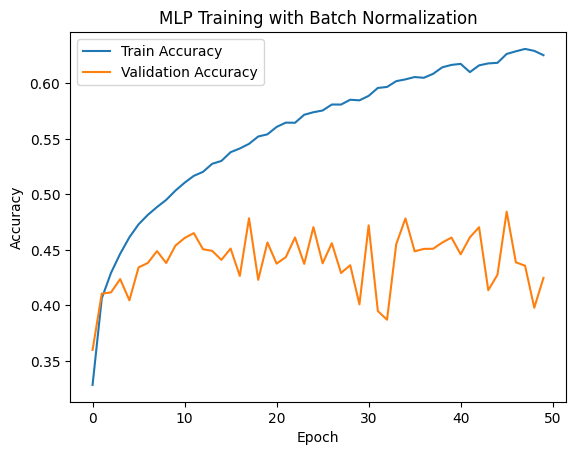

In [35]:
from keras.layers import Dense, Flatten, BatchNormalization
# Define MLP architecture with batch normalization
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))               # Input layer
model.add(Dense(128, activation=relu))                   # First hidden layer
model.add(BatchNormalization())                          # Batch normalization layer
model.add(Dense(64, activation=relu))                    # Second hidden layer
model.add(Dense(10, activation=softmax))                 # Fully connected layer

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

# Train the model with mini-batch SGD
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

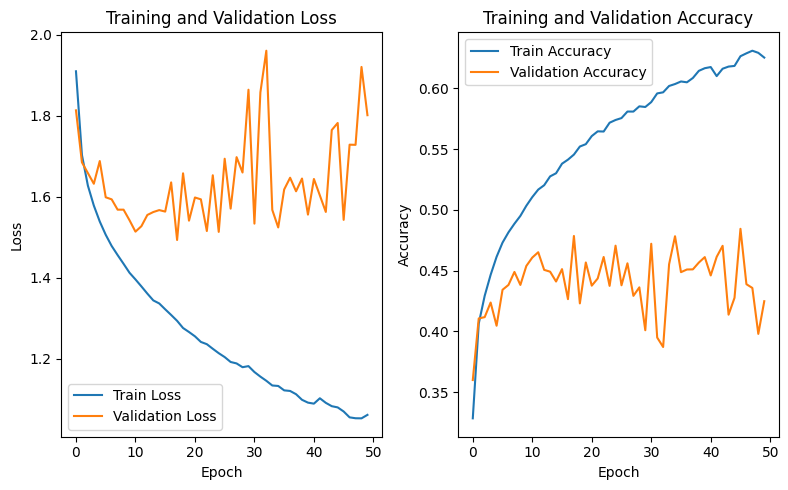

In [39]:
# Plot learning curves for both loss and accuracy
plt.figure(figsize=(8, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [54]:
# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
# Évaluer le modèle sur les données de validation
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')


313/313 [==============================] - 1s 3ms/step - loss: 1.4846 - accuracy: 0.4741
Test Loss: 1.4846199750900269, Test Accuracy: 0.4740999937057495
313/313 [==============================] - 1s 3ms/step - loss: 1.5004 - accuracy: 0.4746
Validation Loss: 1.5004463195800781, Validation Accuracy: 0.4745999872684479


In [75]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from sklearn.base import BaseEstimator
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define a function to create the neural network model
def create_model(learning_rate=0.01, dropout_rate=0.2):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Custom Keras Classifier Wrapper
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, build_fn, epochs=50, batch_size=128, verbose=0, learning_rate=0.01, dropout_rate=0.2):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn(learning_rate=self.learning_rate, dropout_rate=self.dropout_rate)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def score(self, X, y):
        _, accuracy = self.model.evaluate(X, y, verbose=self.verbose)
        return accuracy
    
    def get_params(self, deep=True):
        return {
            'build_fn': self.build_fn,
            'epochs': self.epochs,
            'batch_size': self.batch_size,
            'verbose': self.verbose,
            'learning_rate': self.learning_rate,
            'dropout_rate': self.dropout_rate
        }

# Create a KerasClassifierWrapper
keras_model = KerasClassifierWrapper(build_fn=create_model, epochs=50, batch_size=128, verbose=0)

# Define the hyperparameter search space
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3, 0.5]
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=keras_model, param_distributions=param_grid, n_iter=10, cv=3)
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on validation data
val_loss, val_accuracy = best_model.model.evaluate(x_val, y_val, verbose=0)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Evaluate the best model on test data
test_loss, test_accuracy = best_model.model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


Best Hyperparameters: {'learning_rate': 0.01, 'dropout_rate': 0.2}
Validation Loss: 1.4107307195663452, Validation Accuracy: 0.5024999976158142
Test Loss: 1.3984019756317139, Test Accuracy: 0.506600022315979
